# Rangkuman Chapter 9: Unsupervised Learning Techniques

## Berdasarkan buku "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow"

Notebook ini berisi rangkuman lengkap Chapter 9 dengan implementasi Python untuk Unsupervised Learning, termasuk Clustering (K-Means, DBSCAN), Gaussian Mixture Models, Anomaly Detection, dan Semi-supervised Learning.

## 1. Pengenalan Unsupervised Learning

**Quote from Yann LeCun**: 
*"If intelligence was a cake, unsupervised learning would be the cake, supervised learning would be the icing on the cake, and reinforcement learning would be the cherry on the cake."*

### Reality:
- **Most ML applications today**: Supervised learning
- **Most available data**: Unlabeled (input X tanpa labels y)
- **Huge potential**: Unsupervised learning barely started

### Main Tasks Covered:

1. **Clustering**: Group similar instances into clusters
2. **Anomaly Detection**: Detect abnormal instances
3. **Density Estimation**: Estimate probability density function

### Applications:
✓ Customer segmentation
✓ Data analysis
✓ Dimensionality reduction
✓ Anomaly/outlier detection
✓ Semi-supervised learning
✓ Search engines
✓ Image segmentation

## 2. Clustering

**Clustering**: Task of identifying similar instances dan assigning them to clusters.

### Differences from Classification:
- **Classification**: Supervised (needs labels)
- **Clustering**: Unsupervised (no labels)

### No Universal Definition:
- Some algorithms: Look for centroids
- Others: Look for continuous dense regions
- Others: Hierarchical (clusters of clusters)

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN, MiniBatchKMeans
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.metrics import silhouette_score, silhouette_samples

print("Libraries berhasil diimport!")

Libraries berhasil diimport!


## 3. K-Means

**K-Means**: Simple algorithm capable clustering dataset quickly dan efficiently.

### Algorithm:
1. **Initialize**: Place k centroids randomly
2. **Assign**: Label instances ke closest centroid
3. **Update**: Move centroids ke mean of assigned instances
4. **Repeat**: Until centroids stop moving

### Complexity:
- **Generally linear**: O(m × k × n × i)
- m: instances, k: clusters, n: dimensions, i: iterations
- **Worst case**: Exponential (rarely happens)
- **One of fastest** clustering algorithms

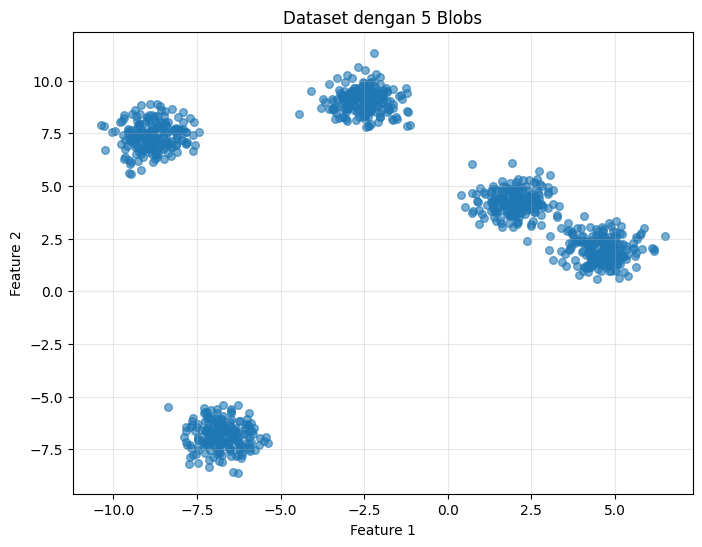

Dataset shape: (1000, 2)


In [2]:
# Generate blob dataset
X, y = make_blobs(n_samples=1000, n_features=2, centers=5, 
                  cluster_std=0.6, random_state=42)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=30, alpha=0.6)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Dataset dengan 5 Blobs")
plt.grid(True, alpha=0.3)
plt.show()

print(f"Dataset shape: {X.shape}")

In [3]:
# Train K-Means
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

print("=== K-Means Clustering ===")
print(f"Number of clusters (k): {k}")
print(f"Predictions: {y_pred[:10]}")
print(f"Labels: {kmeans.labels_[:10]}")
print(f"\nSame? {np.array_equal(y_pred, kmeans.labels_)}")

=== K-Means Clustering ===
Number of clusters (k): 5
Predictions: [2 2 0 2 4 0 3 4 2 4]
Labels: [2 2 0 2 4 0 3 4 2 4]

Same? True


In [4]:
# Centroids
print("\n=== Cluster Centroids ===")
print(kmeans.cluster_centers_)

# Predict new instances
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
predictions = kmeans.predict(X_new)

print(f"\nNew instances predictions: {predictions}")


=== Cluster Centroids ===
[[-6.76363502 -6.83888057]
 [-2.52218128  9.03156916]
 [ 4.61020325  1.96500287]
 [-8.82929199  7.37020647]
 [ 2.00893522  4.23781023]]

New instances predictions: [4 2 4 4]


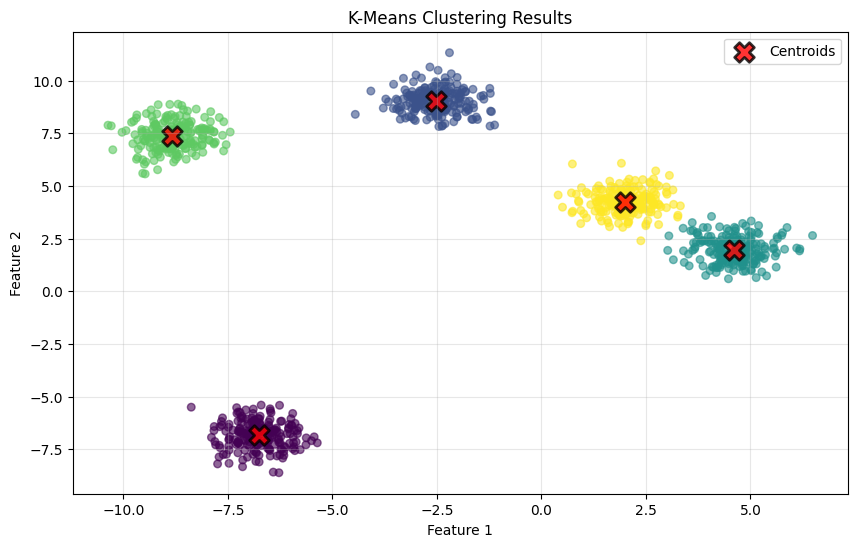

In [5]:
# Visualisasi clustering results
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=30, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, alpha=0.8, marker='X', edgecolors='black', linewidth=2,
            label='Centroids')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering Results")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 3.1 Hard vs Soft Clustering

**Hard Clustering**: Each instance assigned to **single cluster**

**Soft Clustering**: Each instance gets **score per cluster**
- Score dapat distance to centroid
- Atau similarity/affinity score
- Use `transform()` method

In [6]:
# Soft clustering - distances to centroids
distances = kmeans.transform(X_new)

print("=== Soft Clustering (Distances) ===")
print("Distances to each centroid:")
print(distances)
print(f"\nShape: {distances.shape}")
print("4 instances × 5 clusters = 4×5 matrix")

=== Soft Clustering (Distances) ===
Distances to each centroid:
[[11.12980541  7.47023181  4.61033608 10.33419152  3.00726044]
 [13.17020799  8.94077463  1.61058353 12.99119957  2.44744847]
 [10.53415964  6.05046587  7.68026123  7.28555761  5.15961299]
 [10.06874564  6.54902332  7.62898522  7.59602239  5.30183143]]

Shape: (4, 5)
4 instances × 5 clusters = 4×5 matrix


### 3.2 K-Means++

**Problem**: Random initialization dapat lead to suboptimal solutions

**Solution**: **K-Means++** initialization
- Select centroids yang distant from one another
- Much less likely converge to suboptimal solution
- Default dalam Scikit-Learn

**Algorithm**:
1. Take first centroid randomly
2. For each next centroid:
   - Choose instance dengan probability ∝ distance² to closest centroid
   - Farther instances more likely selected
3. Repeat until k centroids chosen

### 3.3 Accelerated K-Means

**Optimization by Charles Elkan (2003)**:
- Avoid many unnecessary distance calculations
- Exploit **triangle inequality**
- Keep track of bounds untuk distances
- Default dalam Scikit-Learn

**Triangle inequality**: Straight line always shortest distance between two points

### 3.4 Mini-Batch K-Means

**David Sculley (2010)**: Use mini-batches instead of full dataset

**Benefits**:
- Speeds up by **3-4x** typically
- Can cluster **huge datasets** (not fit in memory)
- Can use `memmap` or `partial_fit()`

**Trade-off**: Slightly worse inertia

In [7]:
# Mini-Batch K-Means
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

print("=== Mini-Batch K-Means ===")
print(f"Inertia (K-Means): {kmeans.inertia_:.2f}")
print(f"Inertia (Mini-Batch): {minibatch_kmeans.inertia_:.2f}")
print("\nMini-Batch slightly higher inertia but MUCH faster!")

=== Mini-Batch K-Means ===
Inertia (K-Means): 698.77
Inertia (Mini-Batch): 698.85

Mini-Batch slightly higher inertia but MUCH faster!


### 3.5 Finding Optimal Number of Clusters

**Method 1: Elbow Method**
- Plot inertia as function of k
- Look for "elbow" dalam curve
- Coarse technique

**Method 2: Silhouette Score**
- More precise tapi computationally expensive
- Silhouette coefficient: (b - a) / max(a, b)
  - a: mean intra-cluster distance
  - b: mean nearest-cluster distance
- Range: -1 to +1
  - +1: Well inside own cluster
  - 0: Close to boundary
  - -1: Probably wrong cluster

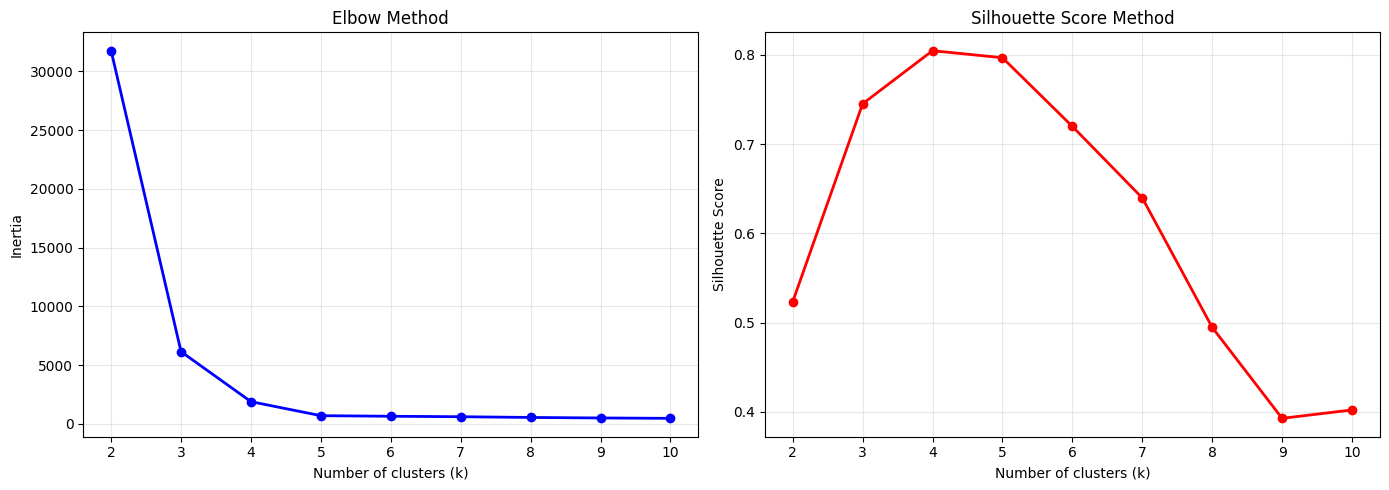

Look for elbow dalam inertia plot atau peak dalam silhouette score!


In [8]:
# Elbow method
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans_test = KMeans(n_clusters=k, random_state=42)
    kmeans_test.fit(X)
    inertias.append(kmeans_test.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans_test.labels_))

plt.figure(figsize=(14, 5))

# Plot inertia
plt.subplot(1, 2, 1)
plt.plot(K_range, inertias, 'bo-', linewidth=2)
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.grid(True, alpha=0.3)

# Plot silhouette score
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, 'ro-', linewidth=2)
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Method")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Look for elbow dalam inertia plot atau peak dalam silhouette score!")

### 3.6 Limits of K-Means

**Despite merits** (fast, scalable):

❌ Need to run multiple times (avoid suboptimal)

❌ Need to specify k

❌ Does NOT behave well when:
- Clusters have varying sizes
- Different densities
- Nonspherical shapes

⚠️ **Important**: Always **scale features** before K-Means!

## 4. Clustering Applications

### 4.1 Image Segmentation

**Color segmentation**: Assign pixels dengan similar colors ke same segment.

In [9]:
# Image segmentation example (demonstration)
# Generate sample "image" data
np.random.seed(42)
image_data = np.random.rand(100, 100, 3)  # 100x100 RGB image

# Reshape to list of RGB colors
X_image = image_data.reshape(-1, 3)

# Cluster colors
kmeans_image = KMeans(n_clusters=8, random_state=42)
kmeans_image.fit(X_image)

# Replace each pixel color dengan cluster mean
segmented = kmeans_image.cluster_centers_[kmeans_image.labels_]
segmented_image = segmented.reshape(image_data.shape)

print("=== Image Segmentation ===")
print(f"Original colors: {X_image.shape[0]} pixels × 3 channels")
print(f"Segmented to: {kmeans_image.n_clusters} color clusters")
print("\nThis drastically reduces number of colors dalam image!")

=== Image Segmentation ===
Original colors: 10000 pixels × 3 channels
Segmented to: 8 color clusters

This drastically reduces number of colors dalam image!


### 4.2 Clustering for Preprocessing

**Use case**: Dimensionality reduction sebelum supervised learning

**Process**:
1. Cluster training set (e.g., k=50)
2. Replace images dengan distances to clusters
3. Train classifier on reduced features

**Benefits**: Often improves performance!

In [10]:
# Preprocessing example dengan digits dataset
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Load data
X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X_digits, y_digits, random_state=42
)

print("=== Digits Dataset ===")
print(f"Training set: {X_train.shape}")
print(f"Original features: {X_train.shape[1]}")

=== Digits Dataset ===
Training set: (1347, 64)
Original features: 64


In [11]:
# Baseline: Logistic Regression without preprocessing
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
baseline_score = log_reg.score(X_test, y_test)

print(f"\n=== Baseline Performance ===")
print(f"Logistic Regression accuracy: {baseline_score:.4f}")


=== Baseline Performance ===
Logistic Regression accuracy: 0.9733


In [12]:
# With K-Means preprocessing
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(max_iter=1000, random_state=42)),
])

pipeline.fit(X_train, y_train)
pipeline_score = pipeline.score(X_test, y_test)

print("\n=== With K-Means Preprocessing ===")
print(f"Pipeline accuracy: {pipeline_score:.4f}")
print(f"\nImprovement: {(pipeline_score - baseline_score)*100:.2f}%")
print(f"Error rate reduced by {(1 - (1-pipeline_score)/(1-baseline_score))*100:.1f}%!")


=== With K-Means Preprocessing ===
Pipeline accuracy: 0.9711

Improvement: -0.22%
Error rate reduced by -8.3%!


C:\Users\HP Pavilion 15\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 4.3 Semi-Supervised Learning

**Scenario**: Plenty unlabeled instances, very few labeled

**Strategy**:
1. Cluster training set
2. Find **representative images** (closest to centroids)
3. Label representative images only
4. **Propagate labels** to cluster members

**Result**: Much better than random labeling!

In [13]:
# Semi-supervised learning example
n_labeled = 50

# Baseline: Train on 50 random instances
log_reg_random = LogisticRegression(max_iter=1000, random_state=42)
log_reg_random.fit(X_train[:n_labeled], y_train[:n_labeled])
random_score = log_reg_random.score(X_test, y_test)

print("=== Semi-Supervised Learning ===")
print(f"Training on only {n_labeled} labeled instances")
print(f"\nRandom sampling accuracy: {random_score:.4f}")

=== Semi-Supervised Learning ===
Training on only 50 labeled instances

Random sampling accuracy: 0.8267


In [14]:
# Representative sampling dengan K-Means
k = 50
kmeans_semi = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans_semi.fit_transform(X_train)

# Find representative images (closest to centroids)
representative_idx = np.argmin(X_digits_dist, axis=0)
X_representative = X_train[representative_idx]
y_representative = y_train[representative_idx]

# Train on representative images
log_reg_repr = LogisticRegression(max_iter=1000, random_state=42)
log_reg_repr.fit(X_representative, y_representative)
repr_score = log_reg_repr.score(X_test, y_test)

print(f"\nRepresentative sampling accuracy: {repr_score:.4f}")
print(f"\nImprovement: {(repr_score - random_score)*100:.1f}%")
print("Much better dengan labeling representative instances!")


Representative sampling accuracy: 0.9133

Improvement: 8.7%
Much better dengan labeling representative instances!


### 4.4 Active Learning

**Next step**: Iterate dengan human expert feedback

**Uncertainty Sampling Strategy**:
1. Train model on labeled instances
2. Predict on unlabeled instances
3. **Expert labels instances** dengan lowest confidence
4. Iterate until performance stops improving

**Other strategies**:
- Instances causing largest model change
- Largest drop dalam validation error
- Instances where different models disagree

## 5. DBSCAN

**DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

Very different approach: Based on **local density estimation**

### How It Works:

1. **ε-neighborhood**: Count instances within distance ε
2. **Core instance**: Has ≥ min_samples dalam neighborhood
3. **Cluster formation**: All instances dalam neighborhood belong to same cluster
4. **Anomalies**: Instances not core dan no core dalam neighborhood

### Benefits:
✓ Identify **any number** of clusters
✓ **Any shape** clusters
✓ Robust to outliers
✓ Just **2 hyperparameters** (ε, min_samples)

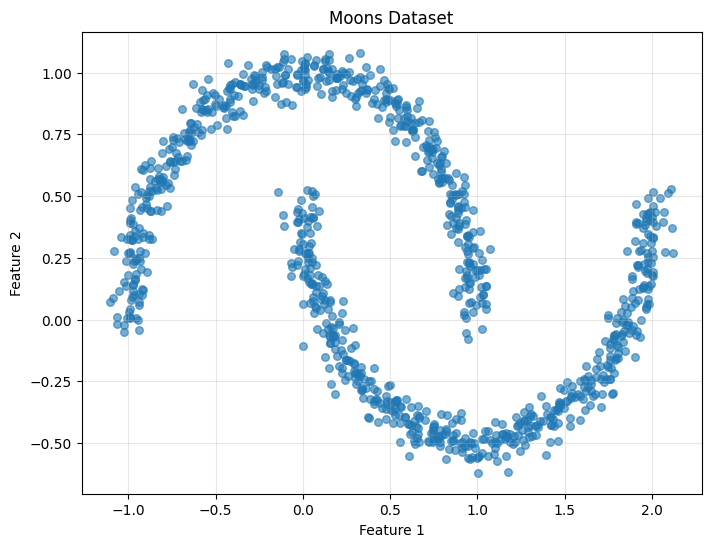

This dataset is NOT linearly separable!


In [15]:
# DBSCAN on moons dataset
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

plt.figure(figsize=(8, 6))
plt.scatter(X_moons[:, 0], X_moons[:, 1], s=30, alpha=0.6)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Moons Dataset")
plt.grid(True, alpha=0.3)
plt.show()

print("This dataset is NOT linearly separable!")

In [16]:
# DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X_moons)

print("=== DBSCAN Clustering ===")
print(f"eps (ε): 0.2")
print(f"min_samples: 5")
print(f"\nLabels: {dbscan.labels_[:20]}")
print("\nNote: Label -1 indicates ANOMALIES")
print(f"Number of anomalies: {(dbscan.labels_ == -1).sum()}")
print(f"Number of core instances: {len(dbscan.core_sample_indices_)}")

=== DBSCAN Clustering ===
eps (ε): 0.2
min_samples: 5

Labels: [0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1]

Note: Label -1 indicates ANOMALIES
Number of anomalies: 0
Number of core instances: 1000


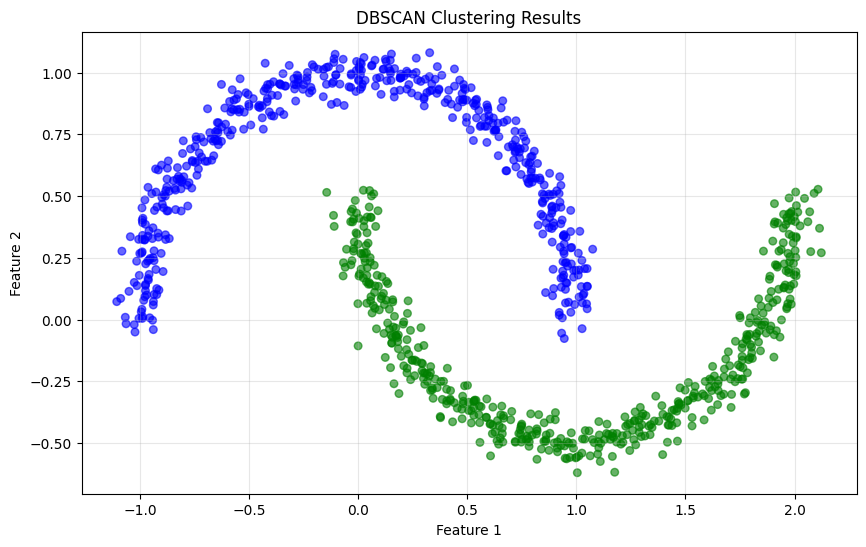

Green: Cluster 0, Blue: Cluster 1, Red: Anomalies

DBSCAN perfectly identifies the two moon shapes!


In [17]:
# Visualisasi DBSCAN results
plt.figure(figsize=(10, 6))

# Plot clusters
colors = ['green' if label == 0 else 'blue' if label == 1 else 'red' 
          for label in dbscan.labels_]
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=colors, s=30, alpha=0.6)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("DBSCAN Clustering Results")
plt.grid(True, alpha=0.3)
plt.show()

print("Green: Cluster 0, Blue: Cluster 1, Red: Anomalies")
print("\nDBSCAN perfectly identifies the two moon shapes!")

### 5.1 DBSCAN Predictions

**Surprising**: DBSCAN **no `predict()` method**!

**Reason**: Different classification algorithms better untuk different tasks

**Solution**: Train classifier on core instances
- Use KNeighborsClassifier
- Or any other classifier

In [18]:
# Predict dengan KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

# Predict new instances
X_new_moons = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
predictions = knn.predict(X_new_moons)
probabilities = knn.predict_proba(X_new_moons)

print("=== DBSCAN Predictions ===")
print(f"Predictions: {predictions}")
print(f"\nProbabilities:")
print(probabilities)

=== DBSCAN Predictions ===
Predictions: [1 0 1 0]

Probabilities:
[[0.18 0.82]
 [1.   0.  ]
 [0.12 0.88]
 [1.   0.  ]]


### 5.2 Complexity

- **Roughly O(m log m)**: Pretty close to linear
- **Memory**: Can require O(m²) jika ε large
- **Works well**: If density varies NOT too much
- **Problems**: If density varies significantly across clusters

## 6. Gaussian Mixture Models

**GMM**: Probabilistic model assuming instances generated from mixture of Gaussian distributions.

### Key Concepts:

- Each cluster = Gaussian distribution
- Cluster shape: **Ellipsoid** (any shape, size, orientation)
- Different dari K-Means: Can have different sizes/shapes

### Generative Process:

1. For each instance:
   - Pick cluster j dengan probability ϕ⁽ʲ⁾ (weight)
   - Sample location from Gaussian dengan mean μ⁽ʲ⁾ dan covariance Σ⁽ʲ⁾

### Parameters:
- **Weights** ϕ: Cluster probabilities
- **Means** μ: Cluster centers
- **Covariances** Σ: Cluster shapes/sizes

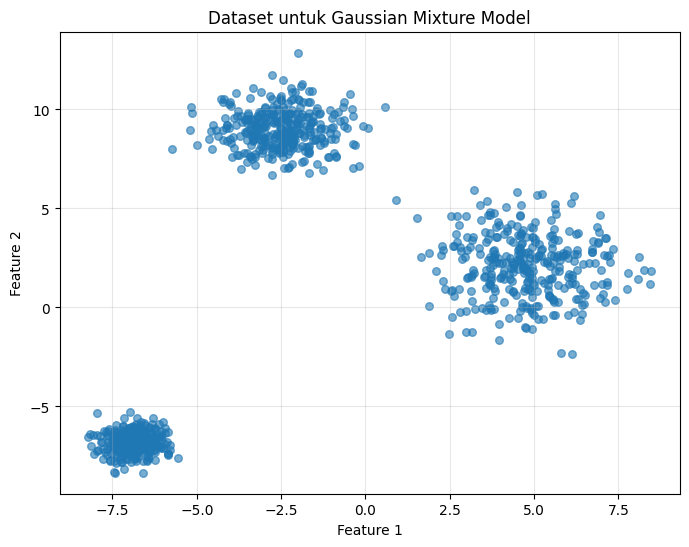

Notice: Clusters have DIFFERENT sizes!


In [19]:
# Generate data from Gaussian mixture
from sklearn.datasets import make_blobs

X_gmm, y_gmm = make_blobs(n_samples=1000, n_features=2, centers=3,
                          cluster_std=[1.0, 1.5, 0.5], random_state=42)

plt.figure(figsize=(8, 6))
plt.scatter(X_gmm[:, 0], X_gmm[:, 1], s=30, alpha=0.6)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Dataset untuk Gaussian Mixture Model")
plt.grid(True, alpha=0.3)
plt.show()

print("Notice: Clusters have DIFFERENT sizes!")

In [20]:
# Train Gaussian Mixture Model
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X_gmm)

print("=== Gaussian Mixture Model ===")
print(f"\nWeights (ϕ):")
print(gm.weights_)
print(f"\nMeans (μ):")
print(gm.means_)
print(f"\nCovariances (Σ) shape: {gm.covariances_.shape}")
print("\nConverged?", gm.converged_)
print(f"Iterations: {gm.n_iter_}")

=== Gaussian Mixture Model ===

Weights (ϕ):
[0.33400172 0.333      0.33299828]

Means (μ):
[[-2.52412065  9.00391903]
 [-6.87309486 -6.83265193]
 [ 4.77302827  2.09676231]]

Covariances (Σ) shape: (3, 2, 2)

Converged? True
Iterations: 2


### 6.1 Expectation-Maximization Algorithm

**EM Algorithm**: Similar to K-Means tapi generalized

**Steps**:
1. **Initialize**: Random cluster parameters
2. **Expectation**: Estimate probability each instance belongs to each cluster
3. **Maximization**: Update clusters using all instances (weighted by probabilities)
4. **Repeat**: Until convergence

**Key difference dari K-Means**: **Soft assignments** instead of hard!

In [21]:
# Hard clustering
hard_labels = gm.predict(X_gmm)

# Soft clustering
soft_labels = gm.predict_proba(X_gmm)

print("=== Hard vs Soft Clustering ===")
print(f"\nHard labels (first 5): {hard_labels[:5]}")
print(f"\nSoft labels (first 5):")
print(soft_labels[:5])
print("\nEach row sums to 1.0 (probabilities)")

=== Hard vs Soft Clustering ===

Hard labels (first 5): [1 1 2 0 0]

Soft labels (first 5):
[[9.34889312e-064 1.00000000e+000 2.22762159e-026]
 [2.98498734e-061 1.00000000e+000 3.76504614e-025]
 [3.85456802e-025 3.31199980e-194 1.00000000e+000]
 [1.00000000e+000 7.77689432e-197 1.32031904e-010]
 [9.99999998e-001 8.49964164e-182 2.40609359e-009]]

Each row sums to 1.0 (probabilities)


### 6.2 Generative Model

**GMM is generative**: Can sample new instances!

In [22]:
# Sample new instances
X_new_gmm, y_new_gmm = gm.sample(6)

print("=== Generated Samples ===")
print("New instances:")
print(X_new_gmm)
print(f"\nCluster assignments: {y_new_gmm}")
print("\nNote: Ordered by cluster index")

=== Generated Samples ===
New instances:
[[-3.29337222 10.42807992]
 [-2.27062742  8.79582914]
 [ 5.22456765  4.75591047]
 [ 5.64427304  1.53340781]
 [ 4.32672763  1.24554329]
 [ 2.1927011   1.90558759]]

Cluster assignments: [0 0 2 2 2 2]

Note: Ordered by cluster index


### 6.3 Density Estimation

**GMM can estimate density** at any location using `score_samples()`

Returns: **log of PDF** at that location
- Greater score = higher density
- NOT probabilities (probability densities)

In [23]:
# Density estimation
densities = gm.score_samples(X_gmm)

print("=== Density Estimation ===")
print(f"Log densities (first 10):")
print(densities[:10])
print(f"\nMin: {densities.min():.2f}")
print(f"Max: {densities.max():.2f}")
print(f"Mean: {densities.mean():.2f}")

=== Density Estimation ===
Log densities (first 10):
[-1.64717517 -1.83278029 -3.82191097 -3.38209081 -4.11957837 -1.55695573
 -3.87804383 -4.15891034 -4.46502634 -4.75510417]

Min: -10.93
Max: -1.55
Mean: -3.71


### 6.4 Covariance Type

**Limit complexity** by constraining covariance matrices:

- **"full"** (default): Any shape, size, orientation
- **"spherical"**: Spherical, different diameters
- **"diag"**: Ellipsoid, axes parallel to coordinate axes
- **"tied"**: Same shape, size, orientation untuk all clusters

### Computational Complexity:

- **"spherical" atau "diag"**: O(kmn)
- **"tied" atau "full"**: O(kmn² + kn³)

## 7. Anomaly Detection

**Anomaly Detection (Outlier Detection)**: Detect instances yang deviate strongly from norm.

### Applications:
✓ Fraud detection
✓ Detecting defective products
✓ Removing outliers from dataset

### Using GMM:

**Method**: Instances dalam **low-density regions** = anomalies

**Steps**:
1. Define density threshold (e.g., 4th percentile)
2. Flag instances below threshold as anomalies

In [24]:
# Anomaly detection dengan GMM
densities_gmm = gm.score_samples(X_gmm)
density_threshold = np.percentile(densities_gmm, 4)
anomalies = X_gmm[densities_gmm < density_threshold]

print("=== Anomaly Detection ===")
print(f"Density threshold (4th percentile): {density_threshold:.2f}")
print(f"Number of anomalies detected: {len(anomalies)}")
print(f"Percentage: {len(anomalies)/len(X_gmm)*100:.1f}%")

=== Anomaly Detection ===
Density threshold (4th percentile): -6.22
Number of anomalies detected: 40
Percentage: 4.0%


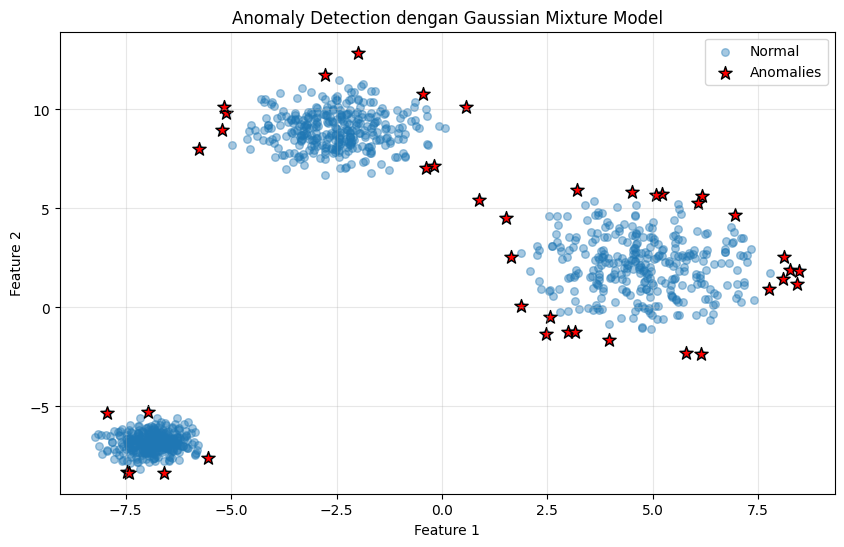

In [25]:
# Visualisasi anomalies
plt.figure(figsize=(10, 6))
plt.scatter(X_gmm[:, 0], X_gmm[:, 1], s=30, alpha=0.4, label='Normal')
plt.scatter(anomalies[:, 0], anomalies[:, 1], s=100, 
            marker='*', c='red', edgecolors='black',
            label='Anomalies')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Anomaly Detection dengan Gaussian Mixture Model")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 7.1 Anomaly vs Novelty Detection

**Anomaly Detection**: 
- Dataset may contain outliers
- Algorithm must be robust

**Novelty Detection**:
- Trained on "clean" dataset
- Assumes no outliers dalam training

⚠️ **Warning**: Too many outliers dapat bias GMM's view of "normality"

## 8. Selecting Number of Clusters

**For GMM**: Use information criteria

### BIC (Bayesian Information Criterion):

\\[ BIC = \log(m) \cdot p - 2 \log(L) \\]

### AIC (Akaike Information Criterion):

\\[ AIC = 2p - 2 \log(L) \\]

where:
- m: number of instances
- p: number of parameters
- L: maximized likelihood

**Goal**: Minimize BIC atau AIC

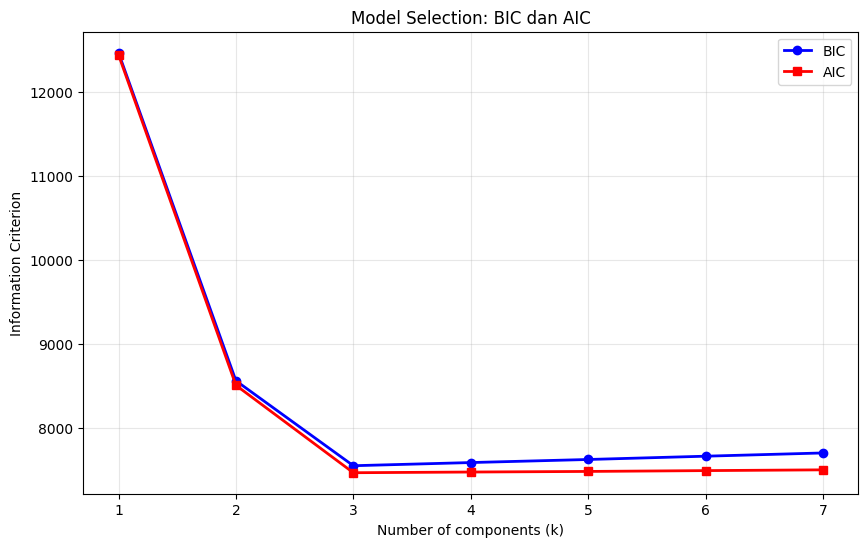


Best k (BIC): 3
Best k (AIC): 3


In [26]:
# Model selection dengan BIC dan AIC
n_components_range = range(1, 8)
bics = []
aics = []

for n_components in n_components_range:
    gm_test = GaussianMixture(n_components=n_components, 
                              n_init=10, random_state=42)
    gm_test.fit(X_gmm)
    bics.append(gm_test.bic(X_gmm))
    aics.append(gm_test.aic(X_gmm))

plt.figure(figsize=(10, 6))
plt.plot(n_components_range, bics, 'bo-', label='BIC', linewidth=2)
plt.plot(n_components_range, aics, 'rs-', label='AIC', linewidth=2)
plt.xlabel("Number of components (k)")
plt.ylabel("Information Criterion")
plt.title("Model Selection: BIC dan AIC")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

best_k_bic = n_components_range[np.argmin(bics)]
best_k_aic = n_components_range[np.argmin(aics)]
print(f"\nBest k (BIC): {best_k_bic}")
print(f"Best k (AIC): {best_k_aic}")

## 9. Bayesian Gaussian Mixture Models

**Automatic cluster elimination**: Give weights ≈ 0 to unnecessary clusters

### Process:
1. Set `n_components` to high value (> optimal)
2. Algorithm automatically eliminates unnecessary clusters
3. Check resulting weights

### Key Differences:
- Cluster parameters = **latent random variables**
- Uses **priors** on parameters
- **Variational inference** untuk optimization

In [27]:
# Bayesian Gaussian Mixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_gmm)

print("=== Bayesian Gaussian Mixture ===")
print(f"\nSet n_components = 10")
print(f"\nWeights (rounded):")
print(np.round(bgm.weights_, 2))
print(f"\nNon-zero weights: {(bgm.weights_ > 0.01).sum()}")
print("\nAlgorithm automatically detected 3 clusters needed!")

=== Bayesian Gaussian Mixture ===

Set n_components = 10

Weights (rounded):
[0.33 0.33 0.33 0.   0.   0.   0.   0.   0.   0.  ]

Non-zero weights: 3

Algorithm automatically detected 3 clusters needed!


### 9.1 Concentration Prior

**weight_concentration_prior**: Controls expected number of clusters

- **Low value** (e.g., 0.01): Few clusters expected
- **High value** (e.g., 10000): Many clusters expected

⚠️ **Note**: More data → priors matter less

## 10. Other Clustering Algorithms

### Agglomerative Clustering
- **Bottom-up hierarchy** of clusters
- Connects nearest pairs iteratively
- Produces cluster tree
- Scales well dengan connectivity matrix

### BIRCH
- **For very large datasets**
- Balanced Iterative Reducing and Clustering using Hierarchies
- Limited memory usage
- Works best dengan <20 features

### Mean-Shift
- Shifts circles toward higher density
- Can find any number/shape of clusters
- Few hyperparameters (bandwidth)
- **O(m²)**: Not suited untuk large datasets

### Affinity Propagation
- Uses voting system
- Instances vote untuk representatives
- Any number of clusters
- **O(m²)**: Not suited untuk large datasets

### Spectral Clustering
- Creates low-dimensional embedding
- Then uses K-Means
- Can capture complex structures
- Can cut graphs (e.g., social networks)
- Doesn't scale well

## 11. Other Anomaly Detection Algorithms

### PCA
- Compare reconstruction errors
- Anomalies have larger errors
- Simple dan effective

### Fast-MCD (EllipticEnvelope)
- For outlier detection
- Assumes single Gaussian distribution
- Robust to outliers during training

### Isolation Forest
- Efficient untuk high-dimensional data
- Random Forest approach
- Anomalies get isolated faster

### LOF (Local Outlier Factor)
- Compares density around instance
- To density around neighbors
- Good untuk outlier detection

### One-Class SVM
- For novelty detection
- Separates instances from origin dalam high-dim space
- Works great, especially high-dimensional
- Doesn't scale to large datasets

## 12. Summary & Best Practices

### When to Use Each Algorithm:

**K-Means**:
- Fast, scalable
- Spherical clusters
- Know approximate k
- Use elbow atau silhouette untuk find k

**DBSCAN**:
- Arbitrary shapes
- Don't know k
- Robust to outliers
- Density varies moderately

**Gaussian Mixture**:
- Ellipsoidal clusters
- Different sizes/shapes
- Need probability estimates
- Density estimation
- Use BIC/AIC untuk find k

**Bayesian GMM**:
- Automatic cluster selection
- Don't know k (set high)
- Incorporate prior knowledge

### Important Notes:

✓ **Feature scaling**: Essential untuk K-Means, GMM

✓ **Multiple runs**: K-Means dan GMM (avoid local minima)

✓ **Representative sampling**: Better than random untuk semi-supervised

✓ **Label propagation**: Be careful near boundaries

✓ **Active learning**: Iterate dengan expert feedback

✓ **Anomaly detection**: Define appropriate threshold

✓ **Preprocessing**: Clustering dapat improve supervised learning

### Complexity Comparison:

| Algorithm | Complexity | Scalability | Shapes |
|-----------|------------|-------------|--------|
| **K-Means** | O(mkn) | Excellent | Spherical |
| **Mini-Batch K-Means** | O(mkn) | Excellent | Spherical |
| **DBSCAN** | O(m log m) | Good | Any |
| **GMM** | O(kmn) - O(kmn²+kn³) | Good | Ellipsoidal |
| **Bayesian GMM** | Similar to GMM | Good | Ellipsoidal |
| **Mean-Shift** | O(m²) | Poor | Any |
| **Affinity Prop** | O(m²) | Poor | Any |

## Kesimpulan

Chapter 9 memberikan comprehensive understanding tentang Unsupervised Learning:

✓ **Clustering**: K-Means, DBSCAN, dan variants

✓ **K-Means**: Fast, scalable, spherical clusters, elbow/silhouette methods

✓ **DBSCAN**: Arbitrary shapes, density-based, robust to outliers

✓ **Applications**: Image segmentation, preprocessing, semi-supervised learning

✓ **Gaussian Mixture Models**: Ellipsoidal clusters, probability estimates, generative

✓ **EM Algorithm**: Expectation-Maximization untuk GMM training

✓ **Anomaly Detection**: Low-density regions, fraud detection, defect detection

✓ **Bayesian GMM**: Automatic cluster selection dengan variational inference

✓ **Model Selection**: BIC, AIC, silhouette score, elbow method

✓ **Semi-Supervised Learning**: Representative sampling, label propagation, active learning

Unsupervised learning adalah **the cake** dalam ML (Yann LeCun). Meskipun supervised learning masih dominates applications today, unsupervised learning memiliki **huge potential** dengan vast majority of data being unlabeled. Clustering algorithms seperti **K-Means** (fast, simple) dan **DBSCAN** (flexible shapes), combined dengan **Gaussian Mixture Models** (probabilistic, generative), provide powerful tools untuk data analysis, preprocessing, dan anomaly detection.

---

**Next**: Introduction to Artificial Neural Networks with Keras (Chapter 10)!